# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

In [8]:
# OpenWeatherMap API Key
import api_key 

# URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
# counter to count the number of calls to API
count = 1 
# counter to count the number of call sets
sets = 1 
# index for the data frame WeatherPy data frame
index = 0 
#Get current time
t0 =time.time()
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
 
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        city_data = requests.get(f"{url}&q={city}").json() 
        city_name.append(city_data["name"])
        cloudiness.append(city_data["clouds"]["all"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        max_temp.append(city_data["main"]["temp_max"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        wind_speed.append(city_data["wind"]["speed"])
        city_namez = city_data["name"]
        print(f"Processing Record {count} of set {sets} | {city_namez}")
        #print(f"{url}&q={city}")  
        index = index +1
        # Increase counter by one
        count = count+1
        # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        if count == 51: 
            t1=time.time()
            count = 1 
            sets = sets+1
            time.sleep(60-(t1-t0))
            t0=time.time()
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
        continue
        
else:
        
    print("---------------------------------")
    print("Data Retrieval Complete"          )
    print("---------------------------------")
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | Veraval
Processing Record 2 of set 1 | Ushuaia
Processing Record 3 of set 1 | Carnarvon
Processing Record 4 of set 1 | Butaritari
Processing Record 5 of set 1 | Dikson
Processing Record 6 of set 1 | Pitangui
Processing Record 7 of set 1 | Chuy
Processing Record 8 of set 1 | Avera
Processing Record 9 of set 1 | Busselton
Processing Record 10 of set 1 | Rikitea
Processing Record 11 of set 1 | Fairview
Processing Record 12 of set 1 | Rindal
Processing Record 13 of set 1 | Castro
Processing Record 14 of set 1 | Igrim
Processing Record 15 of set 1 | Georgetown
Processing Record 16 of set 1 | San Ramon
Processing Record 17 of set 1 | Esperance
Processing Record 18 of set 1 | Hilo
Processing Record 19 of set 1 | Omboue
Processing Record 20 of set 1 | Calama
Processing Record 21 of set 1 | Namibe
Processing Record 22 of set 1 | Faya
Processing Record 23 of set 1 | Kavaratti
City not found. Skipping...
Proce

Processing Record 38 of set 4 | Sisimiut
Processing Record 39 of set 4 | Beloha
Processing Record 40 of set 4 | Eurajoki
Processing Record 41 of set 4 | Khatanga
Processing Record 42 of set 4 | Mount Gambier
Processing Record 43 of set 4 | Poum
City not found. Skipping...
Processing Record 44 of set 4 | Zhuhai
Processing Record 45 of set 4 | Tres Arroyos
Processing Record 46 of set 4 | Hovd
Processing Record 47 of set 4 | Roald
Processing Record 48 of set 4 | Tecoanapa
Processing Record 49 of set 4 | Lasa
City not found. Skipping...
Processing Record 50 of set 4 | Lang Suan
Processing Record 1 of set 5 | Anchorage
Processing Record 2 of set 5 | Gumdag
Processing Record 3 of set 5 | Harper
Processing Record 4 of set 5 | Samarai
Processing Record 5 of set 5 | Hithadhoo
Processing Record 6 of set 5 | Padang
Processing Record 7 of set 5 | Hamilton
Processing Record 8 of set 5 | Oistins
Processing Record 9 of set 5 | Bandarbeyla
Processing Record 10 of set 5 | Tabuk
Processing Record 11 of 

Processing Record 28 of set 8 | Hannibal
Processing Record 29 of set 8 | Ahipara
Processing Record 30 of set 8 | San Francisco
Processing Record 31 of set 8 | Kolodeznyy
Processing Record 32 of set 8 | Deputatskiy
Processing Record 33 of set 8 | Dwarka
Processing Record 34 of set 8 | Iralaya
Processing Record 35 of set 8 | Doha
City not found. Skipping...
Processing Record 36 of set 8 | Vangaindrano
Processing Record 37 of set 8 | Prainha
Processing Record 38 of set 8 | Guerrero Negro
Processing Record 39 of set 8 | Malindi
Processing Record 40 of set 8 | Belgrade
Processing Record 41 of set 8 | Flagstaff
Processing Record 42 of set 8 | Port Macquarie
Processing Record 43 of set 8 | Yeppoon
Processing Record 44 of set 8 | Luderitz
Processing Record 45 of set 8 | Pangai
Processing Record 46 of set 8 | Faanui
Processing Record 47 of set 8 | Sao Filipe
Processing Record 48 of set 8 | Kuyanovo
Processing Record 49 of set 8 | Nampula
City not found. Skipping...
Processing Record 50 of set 8

Processing Record 12 of set 12 | Tara
---------------------------------
Data Retrieval Complete
---------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Create a dictonary 
weather_data = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}



# Convert dictionar to Pandas DataFrame
weather_df = pd.DataFrame(weather_data)


# Display count of weather data values 
weather_df.count()



City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [23]:

# Export the City_Data into a csv
weather_df.to_csv(output_data_file, index_label="City_Id")

# Display data frame head 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Veraval,0,FR,1541458800,81,49.65,0.71,53.60,6.93
1,Ushuaia,75,AR,1541458800,74,-54.81,-68.31,39.20,27.51
2,Carnarvon,0,ZA,1541461741,50,-30.97,22.13,36.62,13.13
3,Butaritari,0,KI,1541461741,100,3.07,172.79,84.77,5.64
4,Dikson,88,RU,1541461741,100,73.51,80.55,16.55,26.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

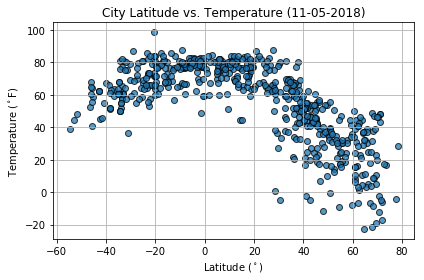

In [28]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()


#### Latitude vs. Humidity Plot

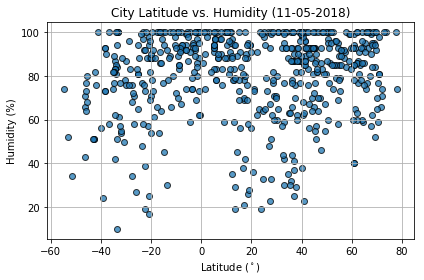

In [30]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

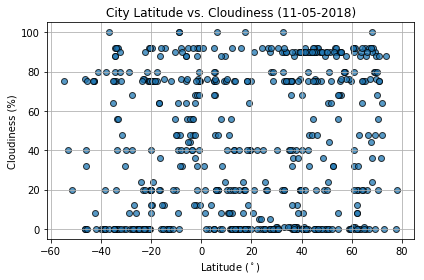

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clouds.png")
plt.show()


#### Latitude vs. Wind Speed Plot

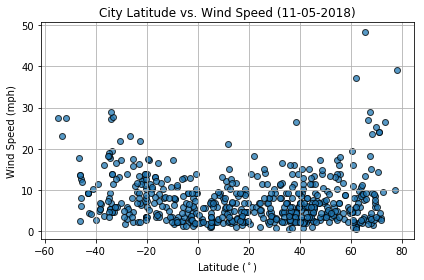

In [32]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("wind.png")
plt.show()
